##**Simple workflow for an Employee Onboarding Process**

Only functions are used as a node.

###**Install Dependencies**

In [3]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 19.0 MB/s eta 0:00:00


In [4]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

###**Define State Schema**

In [5]:
# Define the state schema for the onboarding process
# Any dictionary of this type should have the following keys with their respective value types:
class OnboardingState(TypedDict):
    employee_name: str
    role: str
    equipment_assigned: bool
    orientation_scheduled: bool

###**Define Functions(Nodes)**

In [6]:
# Function to collect employee information
def collect_employee_info(state: OnboardingState) -> OnboardingState:
    print(f"Collecting information for {state['employee_name']} in role {state['role']}.")
    return state


In [7]:
# Function to assign equipment based on role
def assign_equipment(state: OnboardingState) -> OnboardingState:
    if state['role'].lower() in ['developer', 'designer']:
        state['equipment_assigned'] = True
        print(f"Assigned equipment to {state['employee_name']}.")
    else:
        state['equipment_assigned'] = False
        print(f"No equipment needed for {state['employee_name']}.")
    return state

In [8]:
# Function to schedule orientation
def schedule_orientation(state: OnboardingState) -> OnboardingState:
    state['orientation_scheduled'] = True
    print(f"Orientation scheduled for {state['employee_name']}.")
    return state


###**Build a Graph**

In [9]:
# Initialize the StateGraph with the OnboardingState
graph = StateGraph(OnboardingState)

# Add nodes to the graph
graph.add_node("collect_info", collect_employee_info)
graph.add_node("assign_equipment", assign_equipment)
graph.add_node("schedule_orientation", schedule_orientation)

# Define the workflow by adding edges
graph.add_edge(START, "collect_info")
graph.add_edge("collect_info", "assign_equipment")
graph.add_edge("assign_equipment", "schedule_orientation")
graph.add_edge("schedule_orientation", END)

# Set the entry point for the graph
graph.set_entry_point("collect_info")

# Compile the graph into a runnable
runnable = graph.compile()

###**Visualize a Graph**

In [10]:
# Visualize the workflow (requires graphviz)
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

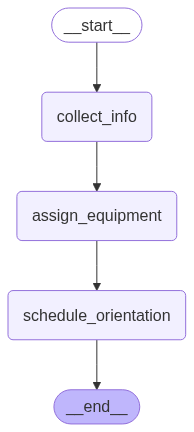

In [11]:
display(
    Image(
        runnable.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

###**Invoke a Graph**

In [12]:
# Example invocation of the workflow
initial_state = {
    "employee_name": "Aarya Naik",
    "role": "Web Developer",
    "equipment_assigned": False,
    "orientation_scheduled": False
}

runnable.invoke(initial_state)

No equipment needed for Aarya Naik.
Orientation scheduled for Aarya Naik.


{'employee_name': 'Aarya Naik',
 'role': 'Web Developer',
 'equipment_assigned': False,
 'orientation_scheduled': True}

In [13]:
# Example invocation of the workflow
initial_state = {
    "employee_name": "Bhavya Singh",
    "role": "Developer",
    "equipment_assigned": False,
    "orientation_scheduled": False
}

runnable.invoke(initial_state)

Assigned equipment to Bhavya Singh.
Orientation scheduled for Bhavya Singh.


{'employee_name': 'Bhavya Singh',
 'role': 'Developer',
 'equipment_assigned': True,
 'orientation_scheduled': True}

##**Conditional Edge**
- Define a graph state.
- Create 3 nodes.
- Use a conditional edge to decide which node to run after the first.
- Run the graph.



###**Define a graph state**

In [15]:
from typing_extensions import TypedDict

class MyGraphState(TypedDict):
    text: str

###**Define the Nodes**

In [16]:
def start_node(state):
    print("--- Start Node ---")
    return {"text": state["text"] + " Let's begin."}

def positive_node(state):
    print("--- Positive Node ---")
    return {"text": state["text"] + " You seem cheerful!"}

def negative_node(state):
    print("--- Negative Node ---")
    return {"text": state["text"] + " You seem upset."}


###**Define the Conditional Logic**

In [17]:
from typing import Literal
import random

def mood_decision(state) -> Literal["positive", "negative"]:
    # Flip a coin to pick mood
    if random.random() < 0.5:
        return "positive"
    return "negative"


###**Build the Graph**

In [21]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

builder = StateGraph(MyGraphState)

# Add nodes
builder.add_node("start", start_node)
builder.add_node("positive", positive_node)
builder.add_node("negative", negative_node)

# Add edges
builder.add_edge(START, "start")
builder.add_conditional_edges("start", mood_decision)
builder.add_edge("positive", END)
builder.add_edge("negative", END)

# Compile
graph_route = builder.compile()


###**Visualize a Graph**

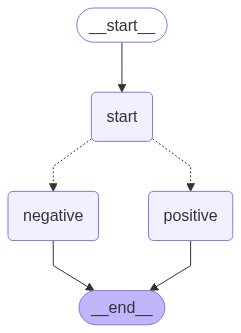

In [20]:
# Optional: Visualize graph
display(Image(graph_route.get_graph().draw_mermaid_png()))

 ### **Invoke the Graph**

In [27]:
output = graph_route.invoke({"text": "Hi there!"})
print("\nFinal Output:", output)

--- Start Node ---
--- Negative Node ---

Final Output: {'text': "Hi there! Let's begin. You seem upset."}


**NOTE**: Everytime it gives random output.